# Using Clustering Models For Second Hypothesis

### In our second hypothesis, we assumed that the as the distance increases, the delivery time increases. Here, we try to divide the observed data into clusters.

## Imports

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../food_delivery_dataset/train.csv')

df = df.replace('NaN', np.nan, regex=True)

df['Restaurant_latitude'] = pd.to_numeric(df['Restaurant_latitude']).abs()
df['Restaurant_longitude'] = pd.to_numeric(df['Restaurant_longitude']).abs()
df['Delivery_location_latitude'] = pd.to_numeric(df['Delivery_location_latitude']).abs()
df['Delivery_location_longitude'] = pd.to_numeric(df['Delivery_location_longitude']).abs()

df = df[~((df['Restaurant_latitude'] <= 1) & (df['Restaurant_longitude'] <= 1) &(df['Delivery_location_latitude'] <= 1) &(df['Delivery_location_longitude'] <= 1))]

## Plotting the graph for the observed data.

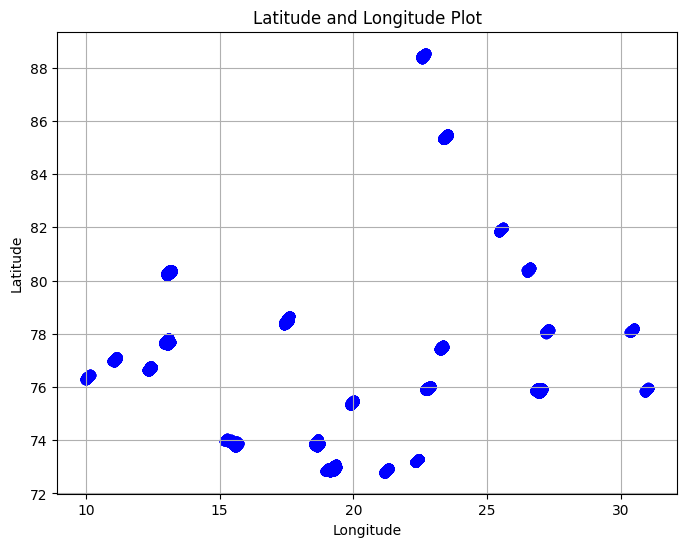

In [41]:
plt.figure(figsize=(8, 6))
# plt.scatter(df['Restaurant_latitude'], df['Restaurant_longitude'], color='red', marker='o')
plt.scatter(df['Delivery_location_latitude'], df['Delivery_location_longitude'], color='blue')

# Adding labels
plt.title('Latitude and Longitude Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.grid(True)
plt.show()

### Here, we want to divide the data into different clusters. We are going to use K-Means clustering in order to classify data. 

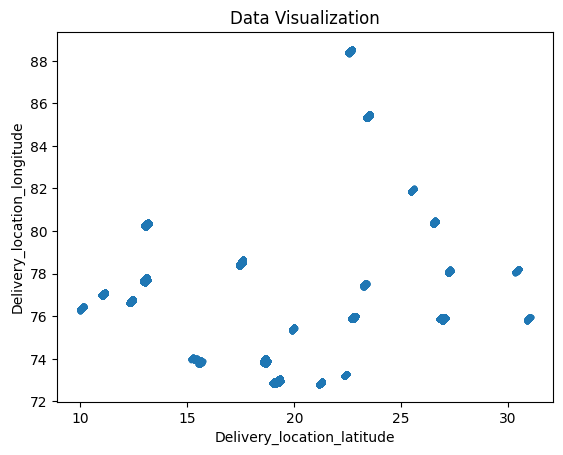

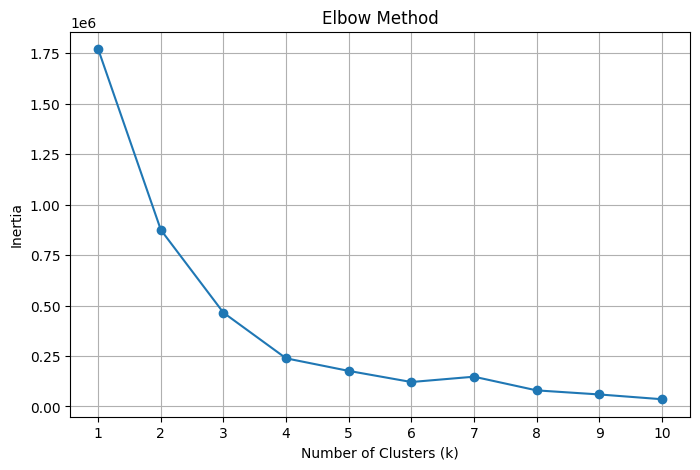

In [45]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Create a synthetic dataset
# X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X = df
# y = df['Restaurant_longitude']

data = pd.DataFrame(X, columns=['Delivery_location_latitude', 'Delivery_location_longitude'])

# Visualize the data
plt.scatter(data['Delivery_location_latitude'], data['Delivery_location_longitude'], s=10)
plt.title('Data Visualization')
plt.xlabel('Delivery_location_latitude')
plt.ylabel('Delivery_location_longitude')
plt.show()

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()

### From the Elbow curce, we can see, the graph starts to flatten at k value 4. So, we can assume the optimal number of clusters to be 4.

Cluster Centers:
 [[ 2.35872693e+01  8.54323607e+01  3.00000000e+00]
 [ 2.00590351e+01  7.33267483e+01  2.00000000e+00]
 [ 2.58470781e+01  7.65467196e+01  1.33305219e+00]
 [ 1.33644109e+01  7.78310401e+01 -2.68673972e-14]]


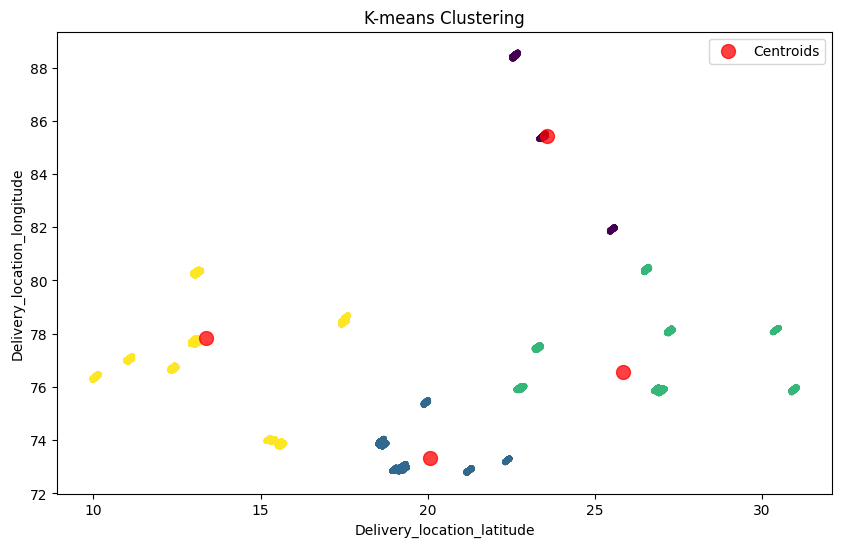

In [47]:
k = 4  # Optimal k from the elbow method
kmeans = KMeans(n_clusters=k)
data['Cluster'] = kmeans.fit_predict(data)

# Print the cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Delivery_location_latitude'], data['Delivery_location_longitude'], c=data['Cluster'], s=10, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=100, alpha=0.75, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Delivery_location_latitude')
plt.ylabel('Delivery_location_longitude')
plt.legend()
plt.show()

### The above is the graph for the 4 different clusters that we received. The red dots show the centroids for each cluster.

### We can vary the number of centroids to get different clusters. In our case, 4 is the optimal number of clusters that we will get form the given data.